<div class="alert alert-info"><b>Import Libraries<b>

In [1]:
from matplotlib import pyplot as plt
import json
import numpy as np
import random
import datetime
import folium
from math import *
import folium
import altair as alt
import pandas as pd
import pickle
import vincent
from altair_saver import save
from tqdm.notebook import tqdm_notebook
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
%run utils_dana.ipynb

<div class="alert alert-info"><b>Global Variables<b>

In [2]:
TILES = 'OpenStreetMap'
FILE_NAME = 'gichon.csv'
NODE = 1012

<div class="alert alert-info"><b>Load node df<b>

In [3]:
def create_anomaly_df(point_id):

    point_df = load_point_data(
        f'./Data_with_anomalies/{point_id}_data_with_anomalies')
    point_df = point_df[[
        'EC', 'PH', 'ORP', 'TEMPERATURE', 'ALL_DIMS_mp', 'ALL_DIMS_if',
        'auto encoder Anomaly', 'ALL_DIMS_eif'
    ]]

    point_df = point_df.reset_index()
    point_df.set_index('DateTime', inplace=True)
    point_df = point_df.resample('5min').mean()

    point_df[[
        'ALL_DIMS_mp', 'ALL_DIMS_if', 'auto encoder Anomaly', 'ALL_DIMS_eif'
    ]] = point_df[[
        'ALL_DIMS_mp', 'ALL_DIMS_if', 'auto encoder Anomaly', 'ALL_DIMS_eif'
    ]].apply(np.ceil)

    point_df = point_df.rename(
        columns={
            'ALL_DIMS_mp': 'MP',
            'ALL_DIMS_if': 'IF',
            'ALL_DIMS_eif': 'EIF',
            'auto encoder Anomaly': 'AUTO ENCODER'
        })
    point_df = point_df.replace(0.0, np.nan)

    return point_df

In [4]:
point_df = create_anomaly_df(NODE)

In [5]:
def plot_multi_variant_anomalies(point_df):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,
                                             figsize=(40, 8),
                                             gridspec_kw={'hspace': 0.01},
                                             sharex=True)
    fig.suptitle(f'Anomaly Detection\n', fontsize='30')

    ax1.plot(point_df['EC'], color='deeppink')
    ax1.set_ylabel('EC', fontsize='8')

    ax2.plot(point_df['PH'], color='teal')
    ax2.set_ylabel('PH', fontsize='8')

    ax3.plot(point_df['ORP'], color='navy')
    ax3.set_ylabel('ORP', fontsize='8')

    ax4.plot(point_df['TEMPERATURE'], color='mediumorchid')
    ax4.set_ylabel('TEMPERATURE', fontsize='8')
    ax4.set_xlabel('Date', fontsize='15')

    window_color = {
        'AUTO ENCODER': 'red',
        'EIF': 'lightgreen',
        'IF': 'lightskyblue',
        'MP': 'gold'
    }

    rect_legend = []
    for model in ['AUTO ENCODER', 'EIF', 'IF', 'MP']:
        indx = point_df.loc[point_df[model] == 1].index
        for i in indx:
            # Create rectangle x coordinates
            startTime = i - datetime.timedelta(minutes=5 * 12)
            endTime = startTime + datetime.timedelta(minutes=5 * 24)

            # convert to matplotlib date representation
            start = mdates.date2num(startTime)
            end = mdates.date2num(endTime)
            width = end - start

            # Plot rectangle
            rect1 = Rectangle((start, 0),
                              width,
                              7000,
                              color=window_color[model])
            rect2 = Rectangle((start, 0), width, 15, color=window_color[model])
            rect3 = Rectangle((start, -400),
                              width,
                              700,
                              color=window_color[model])
            rect4 = Rectangle((start, 0), width, 30, color=window_color[model])

            ax1.add_patch(rect1)
            ax2.add_patch(rect2)
            ax3.add_patch(rect3)
            ax4.add_patch(rect4)
        rect_legend.append(rect1)

    plt.legend(rect_legend, ['AUTO ENCODER', 'EIF', 'IF', 'MP'],
               bbox_to_anchor=(-0.06, 2))
    plt.show()

    # Anomalies plots
    for model in ['AUTO ENCODER', 'EIF', 'IF', 'MP']:
        df = point_df.reset_index()
        indx = df.loc[df[model] == 1].index
        temp = indx[0]
        for i, num in enumerate(indx):
            if indx[i] > temp + 12:

                fig, (ax1, ax2, ax3,
                      ax4) = plt.subplots(4,
                                          figsize=(14, 4),
                                          gridspec_kw={'hspace': 0},
                                          sharex=True)
                fig.suptitle(
                    f"{model} Anomaly at {df['DateTime'].iloc[num].date()}",
                    fontsize='15')

                ax1.plot(point_df['EC'][num - 12:num + 13], color='deeppink')
                ax1.set_ylabel('EC', fontsize='8')
                ax1.patch.set_facecolor(window_color[model])
                ax1.patch.set_alpha(0.05)

                ax2.plot(point_df['PH'][num - 12:num + 13], color='teal')
                ax2.set_ylabel('PH', fontsize='8')
                ax2.patch.set_facecolor(window_color[model])
                ax2.patch.set_alpha(0.05)

                ax3.plot(point_df['ORP'][num - 12:num + 13], color='navy')
                ax3.set_ylabel('ORP', fontsize='8')
                ax3.patch.set_facecolor(window_color[model])
                ax3.patch.set_alpha(0.05)

                ax4.plot(point_df['TEMPERATURE'][num - 12:num + 13],
                         color='mediumorchid')
                ax4.set_ylabel('TEMPERATURE', fontsize='8')
                ax4.set_xlabel('Date', fontsize='15')
                ax4.patch.set_facecolor(window_color[model])
                ax4.patch.set_alpha(0.1)
                temp = indx[i]
                plt.tight_layout()
                plt.show()


#         print('--------------------------------------------------------------------------------------------------------------------------')

<div class="alert alert-info"><b>Plot Anomalies<b>

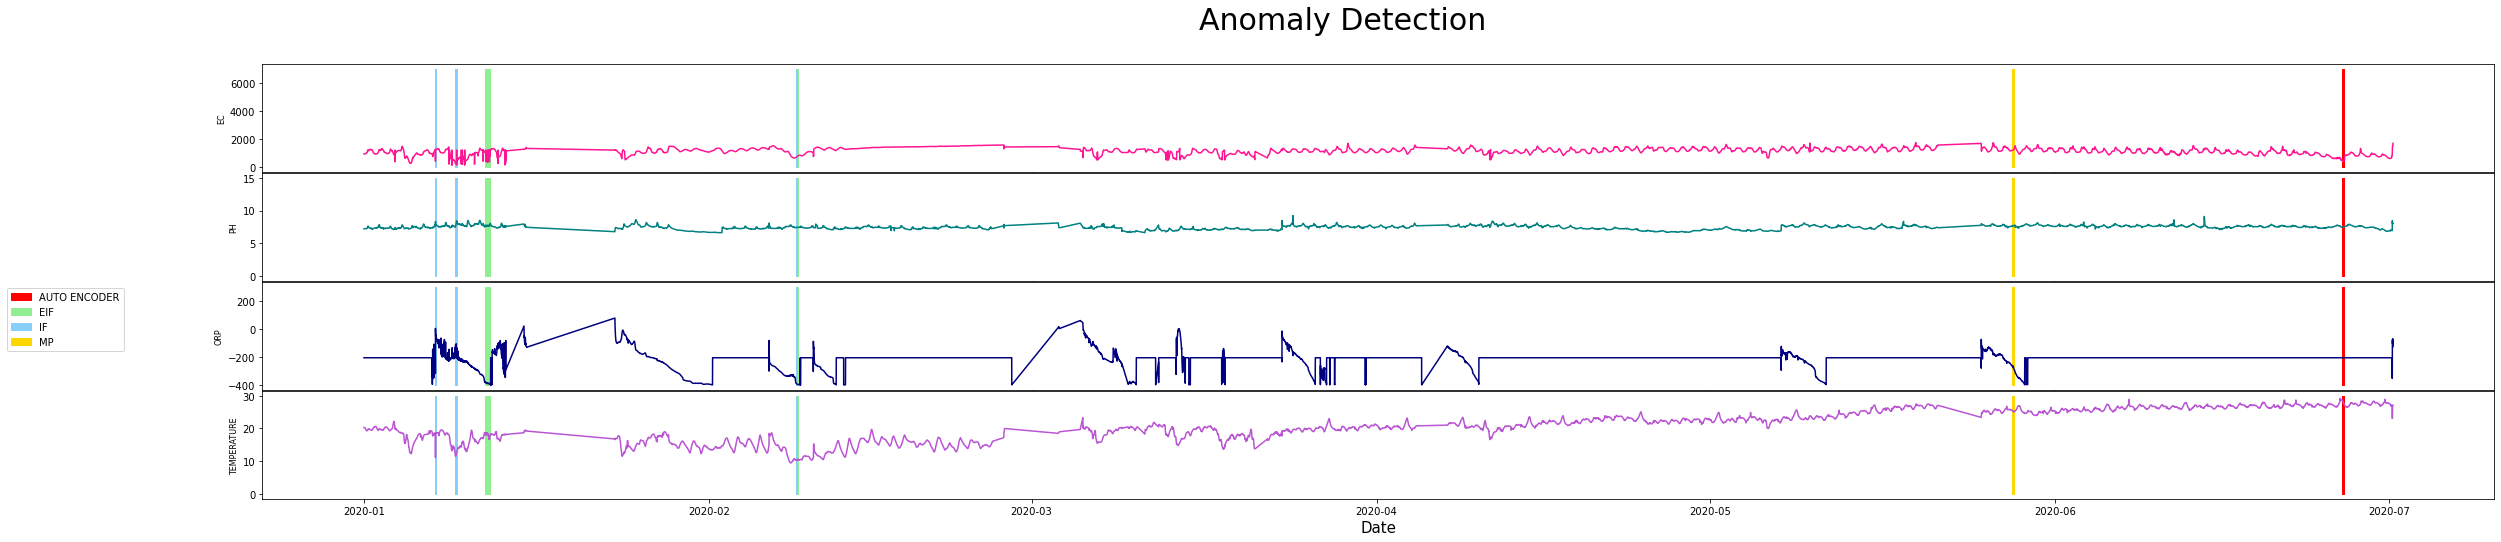

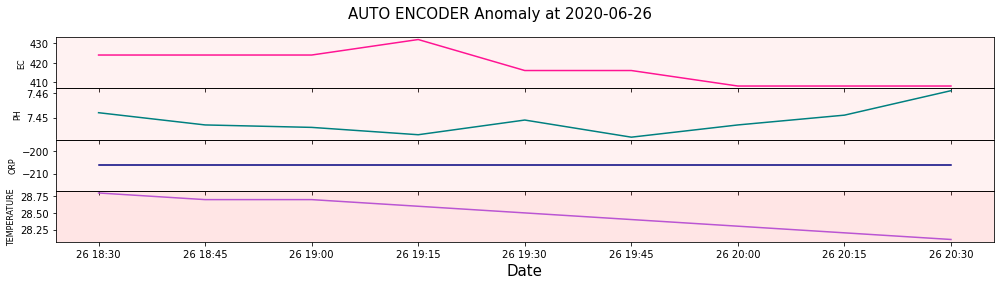

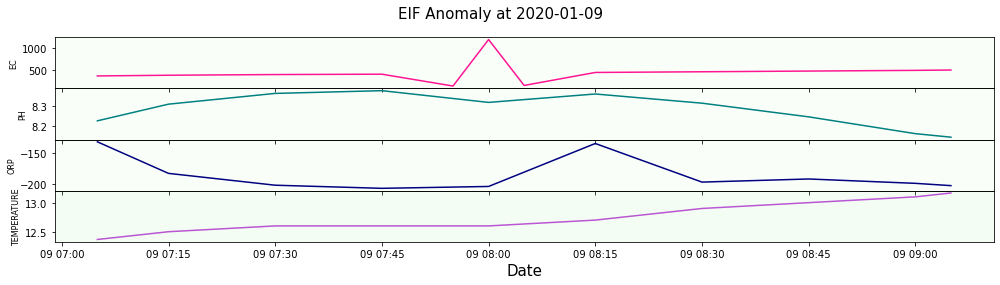

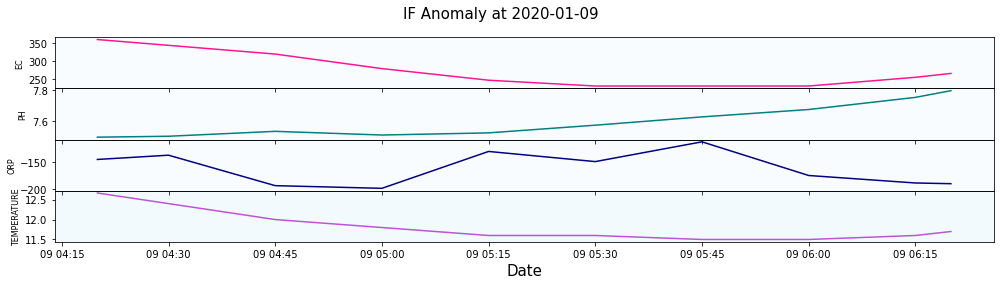

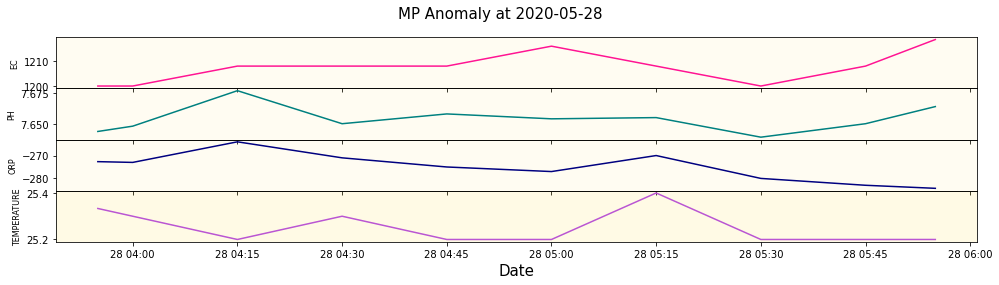

In [6]:
plot_multi_variant_anomalies(point_df)

In [ ]:
<div class="alert alert-info"><b>Import Libraries<b>

from matplotlib import pyplot as plt
import json
import numpy as np
import random
import datetime
import folium
from math import *
import folium
import altair as alt
import pandas as pd
import pickle
import vincent
from altair_saver import save
from tqdm.notebook import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
%run utils_dana.ipynb

<div class="alert alert-info"><b>Global Variables<b>

TILES = 'OpenStreetMap'
FILE_NAME = 'gichon.csv'
RESAMPLE = '10min'

def create_anomaly_df(point_id):
    
    point_df = load_point_data(f'./Data_and_anomalies/{point_id}_data_with_anomalies')
    point_df = point_df[['EC', 'PH', 'ORP', 'TEMPERATURE', 'EC_mp', 'PH_mp', 'ORP_mp', 
                         'TEMPERATURE_mp', 'EC_if', 'PH_if', 'ORP_if', 'TEMPERATURE_if', 
                         'EC_eif', 'PH_eif', 'ORP_eif', 'TEMPERATURE_eif']]

    point_df = point_df.reset_index()
    for col in ['EC_mp', 'PH_mp', 'ORP_mp', 'TEMPERATURE_mp', 'EC_if', 'PH_if', 'ORP_if',
                'TEMPERATURE_if', 'EC_eif', 'PH_eif', 'ORP_eif', 'TEMPERATURE_eif']:
        ind = point_df[point_df[col] == 1].index

        for i in ind:
            point_df[col].iloc[i-12:i+13] = 1

    if len(point_df) >= 20000:
        RESAMPLE = '15min'
    elif len(point_df) >= 10000:
        RESAMPLE = '10min'
    else:
        RESAMPLE = '5min'

    point_df.set_index('DateTime', inplace=True)
    point_df = point_df.resample(RESAMPLE).mean()
    point_df = point_df.reset_index()
    point_df = point_df.rename(columns={'DateTime': 'date'})

    point_df['EC_legend'] = 'EC'
    point_df['PH_legend'] = 'PH'
    point_df['ORP_legend'] = 'ORP'
    point_df['TEMPERATURE_legend'] = 'TEMPERATURE'

    point_df[['EC_mp', 'PH_mp', 'ORP_mp', 'TEMPERATURE_mp', 'EC_if', 'PH_if', 
              'ORP_if', 'TEMPERATURE_if', 'EC_eif', 'PH_eif', 'ORP_eif', 
              'TEMPERATURE_eif']] = point_df[['EC_mp', 'PH_mp', 'ORP_mp', 'TEMPERATURE_mp', 
                                              'EC_if', 'PH_if', 'ORP_if', 'TEMPERATURE_if', 
                                              'EC_eif', 'PH_eif', 'ORP_eif', 'TEMPERATURE_eif']].apply(np.ceil)

    point_df = point_df.replace(0.0, np.nan)

    for model in ['mp', 'if', 'eif']:
        for feature in ['EC', 'PH', 'ORP', 'TEMPERATURE']:
            for i, row in point_df.iterrows():
                if row[f'{feature}_{model}'] == 1.0:
                    if point_df[f'{feature}_legend'].iloc[i] == feature:                    
                        point_df[f'{feature}_legend'].iloc[i] = model
                    elif point_df[f'{feature}_legend'].iloc[i] == model:
                        continue
                    elif f'{model}+' in point_df[f'{feature}_legend'].iloc[i] or f'+{model}' in point_df[f'{feature}_legend'].iloc[i]:
                        continue
                    else:
                        point_df[f'{feature}_legend'].iloc[i] = point_df[f'{feature}_legend'].iloc[i] + f'+{model}'
    return point_df

def anomaly_graph(df, col):
    
    alt.data_transformers.enable('default', max_rows=None)

    color = alt.Color(f'{col}_legend:N')
    brush = alt.selection_interval(encodings=['x'])
    click = alt.selection_multi(encodings=['color'])

    graph = alt.Chart(
              ).mark_bar(
              ).transform_impute(col, 
                                 key='date', 
                                 value=None, 
                                 groupby=[f'{col}_legend']
              ).encode(alt.X('date:T', title='Date'),
                       alt.Y(f'{col}:Q',
                             title=f'{col}'),
                       color=alt.condition(brush,
                                           color, 
                                           alt.value('lightgray'))
              ).properties(width=350,
                           height=100
              ).add_selection(brush
              ).transform_filter(click)

    anomaly = alt.Chart(
                ).mark_line(
                ).transform_impute(col, 
                                   key='date', 
                                   value=None, 
                                   groupby=[f'{col}_legend']
                ).encode(alt.X('date:T', 
                               title='Date'),
                         alt.Y(f'{col}:Q',
                               title=f'{col}'),
                         color=alt.condition(click, 
                                             f'{col}_legend:N', 
                                             alt.value('lightgray'))
                ).transform_filter(brush
                ).properties(width=350,
                             height=100
                ).add_selection(click)

    concat = alt.hconcat(graph,
                         anomaly,
                         data=df,
                         title=f'{col} Anomaly Detection')
    
    return concat

def create_total_graph(df):    
    graphs = []
    for col in ['PH', 'EC', 'ORP', 'TEMPERATURE']:
        graphs.append(anomaly_graph(df, col))

    anomaly = alt.vconcat(graphs[0],
                          graphs[1],
                          graphs[2],
                          graphs[3]).resolve_scale(color='independent')
    return anomaly

node = 1012
point_df = create_anomaly_df(node)
anomaly = create_total_graph(point_df)

anomaly